In [1]:
!conda install --yes tensorflow
import tensorflow as tf

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

Solving environment: done

# All requested packages already installed.



## Loading the dataset

In [2]:
(x_train, y_train), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

print(f'Labels: {np.unique(y_train)}')
print(f'First 10 train labels: {y_train[:10]}')
print(f'Train images shape: {x_train.shape}')
print(f'Train labels shape: {y_train.shape}')
print(f'Test images shape: {x_test.shape}')

Labels: [0 1 2 3 4 5 6 7 8 9]
First 10 train labels: [9 0 0 3 0 2 7 2 5 5]
Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)


## Labels creation

In [3]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Data visualization

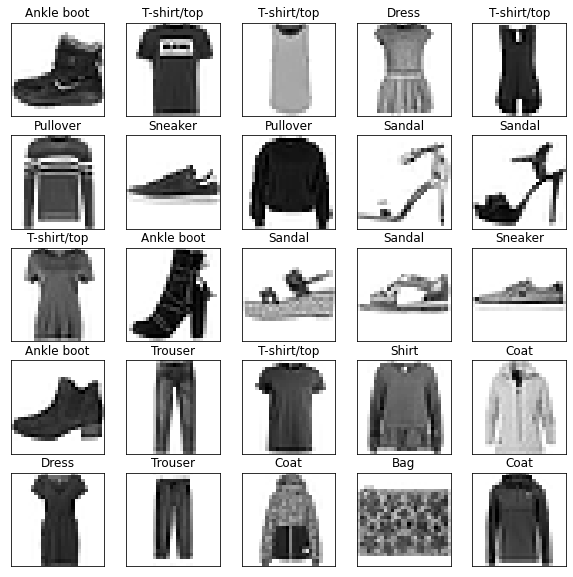

In [4]:
def show_img_with_labels(images, img_labels):
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
        
    for i in range(25):
        ax = axes.flat[i]
        
        ax.set_title(labels[img_labels[i]])
        ax.imshow(images[i], cmap=plt.cm.binary)

        ax.set_xticks([])
        ax.set_yticks([])

show_img_with_labels(x_train, y_train) 

## Transform data

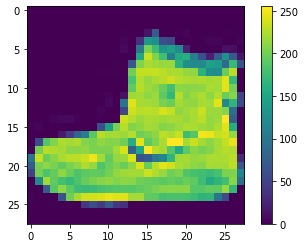

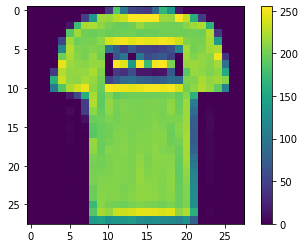

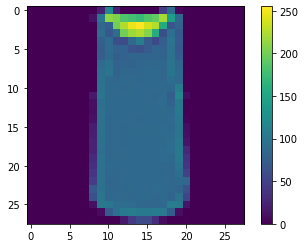

In [5]:
for i in range(3):
    plt.figure()
    plt.imshow(x_train[i])
    plt.colorbar()
    plt.show()

In [6]:
x_train = x_train / 255
x_test = x_test / 255

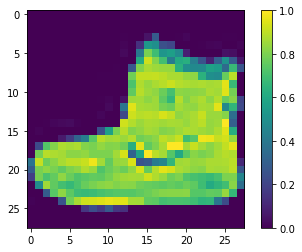

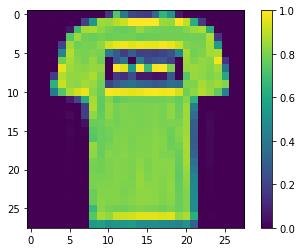

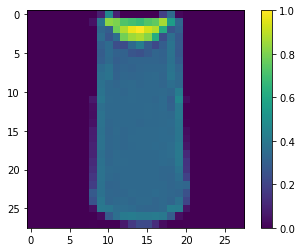

In [7]:
for i in range(3):
    plt.figure()
    plt.imshow(x_train[i])
    plt.colorbar()
    plt.show()

## Model creation

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4914 - accuracy: 0.8258
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3739 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3403 - accuracy: 0.8747
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3188 - accuracy: 0.8832
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2999 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2885 - accuracy: 0.8914
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2766 - accuracy: 0.8967
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2676 - accuracy: 0.8997
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2566 - accuracy: 0.9045
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

## Predict data and save them

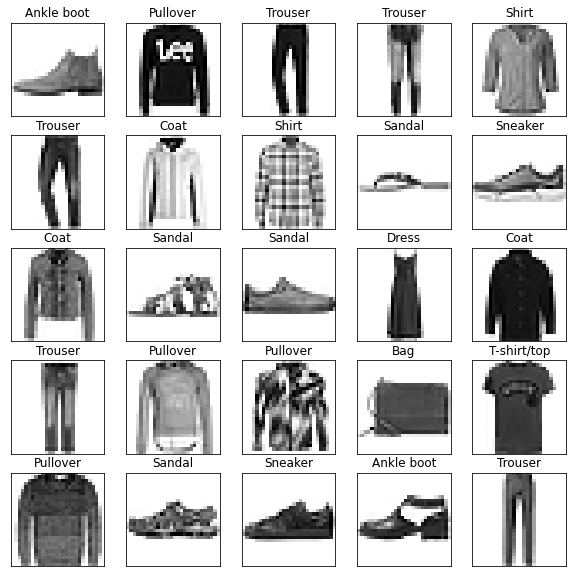

In [10]:
predictions = np.argmax(model.predict(x_test), axis=-1)
show_img_with_labels(x_test, predictions)

In [11]:
pd.DataFrame(predictions).to_csv("result.csv", index_label='Id', header=['Class'])